<font size = 3>**Compare results across classifiers and parameters**

**XGB** with or without second classifier (always XGB) <br>
**CNN** with or without second classifier (always XGB) <br><br>
<i>Both across various optical flow parameters</i>

In [111]:
import sys
sys.path.append("/users/tom/git/neon_blink_detection/")
sys.path.append("/users/tom/git/neon_blink_detection/src")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import numpy as np

# this is actually a CNN (this was prior to changing the exp name)
cnn_path = "/users/tom/git/neon_blink_detection/training-XGBClassifier-3-200320231657/n_lay5-lay_intv7-grid4-win15-trans0.0-scale0.0-speed0.0/results.pkl"

with open(cnn_path, 'rb') as f:
    cnn_results = pickle.load(f)

xgb_path = "/users/tom/git/neon_blink_detection/training-XGBClassifier-3-100320231148/n_lay5-lay_intv7-grid4-win15-trans0.0-scale0.0/results.pkl"

with open(xgb_path, 'rb') as f:
    xgb_results = pickle.load(f)

PI_xgb_path = "/users/tom/git/blink_detection/training-XGBClassifier-3-290120230720/n_layers5-layer_interval7-grid4-win15/results.pkl"

with open(PI_xgb_path, 'rb') as f:
    PI_xgb_results = pickle.load(f)

In [112]:
precision = cnn_results.metrics_sample_val

# fig, ax = plt.subplots()

mean_precision_cnn = np.mean([cnn_results.metrics_pp_val.scores_list[x].F1 for x in range(5)])
mean_recall_cnn = np.mean([cnn_results.metrics_pp_val.scores_list[x].recall for x in range(5)])
mean_f1_score_cnn = np.mean([cnn_results.metrics_pp_val.scores_list[x].precision for x in range(5)])

mean_precision_xgb = np.mean([xgb_results.metrics_pp_val.scores_list[x].F1 for x in range(5)])
mean_recall_xgb = np.mean([xgb_results.metrics_pp_val.scores_list[x].recall for x in range(5)])
mean_f1_score_xgb = np.mean([xgb_results.metrics_pp_val.scores_list[x].precision for x in range(5)])



In [113]:
# print results in a visally appealing way
print("CNN")
print("--------------------")
print("Precision: ", mean_precision_cnn)
print("Recall: ", mean_recall_cnn)
print("F1 Score: ", mean_f1_score_cnn)
print("XGB")
print("--------------------")
print("Precision: ", mean_precision_xgb)
print("Recall: ", mean_recall_xgb)
print("F1 Score: ", mean_f1_score_xgb)

CNN
--------------------
Precision:  0.9487285807744603
Recall:  0.9711876729965162
F1 Score:  0.9275466876311128
XGB
--------------------
Precision:  0.9338402586407414
Recall:  0.960949825028932
F1 Score:  0.9087036289905799


In [114]:

mean_precision_cnn = np.mean([cnn_results.metrics_pp_test.scores_list[x].F1 for x in range(5)])
mean_recall_cnn = np.mean([cnn_results.metrics_pp_test.scores_list[x].recall for x in range(5)])
mean_f1_score_cnn = np.mean([cnn_results.metrics_pp_test.scores_list[x].precision for x in range(5)])

mean_precision_xgb = np.mean([xgb_results.metrics_pp_test.scores_list[x].F1 for x in range(5)])
mean_recall_xgb = np.mean([xgb_results.metrics_pp_test.scores_list[x].recall for x in range(5)])
mean_f1_score_xgb = np.mean([xgb_results.metrics_pp_test.scores_list[x].precision for x in range(5)])

In [115]:
# print results in a visally appealing way
print("CNN")
print("--------------------")
print("Precision: ", mean_precision_cnn)
print("Recall: ", mean_recall_cnn)
print("F1 Score: ", mean_f1_score_cnn)
print("XGB")
print("--------------------")
print("Precision: ", mean_precision_xgb)
print("Recall: ", mean_recall_xgb)
print("F1 Score: ", mean_f1_score_xgb)

CNN
--------------------
Precision:  0.961206568381202
Recall:  0.9772771792360431
F1 Score:  0.9457606414262774
XGB
--------------------
Precision:  0.9603155706528002
Recall:  0.9808031341821742
F1 Score:  0.9407025566034226


In [116]:
mean_f1_score_xgb

0.9407025566034226

In [117]:
cnn_results.metrics_pp_val.n_samples_list

[1233074, 454176, 300879, 104046, 189164, 159913]

In [118]:
dir(cnn_results.metrics_pp_val.scores_list[0])

['F1',
 'FN',
 'FP',
 'IoU',
 'RTD_offset',
 'RTD_onset',
 'RTO_offset',
 'RTO_onset',
 'TP',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'confusion_matrix',
 'deletions',
 'duration_gt',
 'duration_pd',
 'insertions',
 'mean_IoU',
 'precision',
 'recall',
 'replace']

In [119]:
import sys

sys.path.append("/users/tom/git/neon_blink_detection/")
sys.path.append("/users/tom/git/neon_blink_detection/src")

from training.evaluation import evaluate
from training.helper import ClassifierParams, Results
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_validate
from copy import copy
from functions.classifiers import Classifier, load_predictions, save_predictions
from src.post_processing import classify
from src.neon_blink_detector import get_params
of_params, pp_params, _ = get_params()
from src.features_calculator import create_grids
from pathlib import Path
import numpy as np
from random import choices
from training.datasets_loader import (
    concatenate,
    concatenate_all_samples,
)
from training.helper import (
    get_augmentation_options,
    get_export_dir,
    get_training_dir,
)
from src.event_array import Samples
from src.helper import OfParams, PPParams, AugParams
from training.helper import get_experiment_name_new
from training.video_loader import video_loader

clip_names = np.load("/users/tom/git/neon_blink_detection/clip_list.npy")

of_params = OfParams(n_layers=5, layer_interval=7, average=False, img_shape=(64, 64), grid_size=20, step_size=7, window_size=11, stop_steps=3)

aug_params_options = get_augmentation_options()
aug_params = aug_params_options[0]

rec = video_loader(of_params, aug_params)

rec.collect(clip_names, bg_ratio=1, augment=False, idx=0)

options 1

Loading clip: 1000-2022-12-14-09-43-56-0fcac6d3
Number of clips: 1

Loading clip: 1002-2022-12-14-11-43-58-23e05b8c
Number of clips: 1

Loading clip: 1004-2022-12-14-13-14-14-c8a509b9
Number of clips: 2

Loading clip: 1005-2022-12-14-15-07-31-ba8d94d5
Number of clips: 2

Loading clip: 1010-2022-12-15-13-27-31-f46dcdd8
Number of clips: 1

Loading clip: 1140-2023-01-12-13-15-56-2f0172d2
Number of clips: 3

Loading clip: 1141-2023-01-12-14-17-58-470c61da
Number of clips: 3

Loading clip: 1142-2023-01-12-14-27-07-34f1fccf
Number of clips: 1

Loading clip: 1144-2023-01-12-16-36-04-2c1ecc99
Number of clips: 1

Loading clip: 1151-2023-01-13-12-03-16-bca271ec
Number of clips: 2

Loading clip: 1152-2023-01-13-13-03-33-ddabe2a5
Number of clips: 2

Loading clip: 1156-2023-01-13-15-15-36-93d791d5


In [ ]:
import joblib
from src.post_processing import post_process
from functions.classifiers import Classifier
from functions.pipeline import get_classifier_params

features = concatenate(rec.all_features, clip_names)
samples_gt = concatenate_all_samples(rec.all_samples, clip_names)
labels = samples_gt.labels

xgb_path = "/users/tom/git/neon_blink_detection/training-XGBClassifier-3-100320231148/n_lay5-lay_intv7-grid4-win15-trans0.0-scale0.0/results.pkl"

clf_path = "/users/tom/git/neon_blink_detection/weights/xgb.sav"
clf = joblib.load(str(clf_path))

classifier_params = get_classifier_params(type="XGB", use_second_classifier=False)
clf_path = "/users/tom/git/neon_blink_detection/weights/"
clf = Classifier(classifier_params, clf_path)
clf.load_base_classifier(idx=0)

In [ ]:
clf.predict_all_clips(rec.all_features)


In [ ]:
fdr_neon = []
fdr_PI = [] 
for i in range(1,6): 
    
    fdr_neon.append(xgb_results.metrics_pp_val.scores_list[i].FP / (xgb_results.metrics_pp_val.scores_list[i].TP + xgb_results.metrics_pp_val.scores_list[i].FP))

    fdr_PI.append(xgb_results_PI.metrics_pp_val.scores_list[i].FP / (xgb_results_PI.metrics_pp_val.scores_list[i].TP + xgb_results_PI.metrics_pp_val.scores_list[i].FP))



In [ ]:
np.mean(x)

0.08873133245884522

In [85]:
acc_val = []
recall_val = []

acc_test = []
f1_test = []

for ival in range(1, 6):

    recall_val.append(xgb_results.metrics_pp_val.scores_list[ival].recall)
    TP = xgb_results.metrics_pp_val.scores_list[ival].TP
    FP = xgb_results.metrics_pp_val.scores_list[ival].FP

recall_test = xgb_results.metrics_pp_test.scores_list[0].recall

In [86]:
print(np.mean(recall_val))
print(recall_test)

0.948261214154507
0.9794319294809011


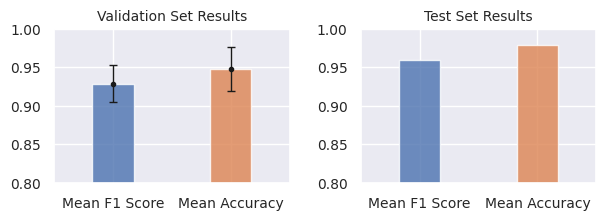

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style and color palette
sns.set()

# create plot with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2))

index = np.arange(2)
bar_width = 0.35
opacity = 0.8

# Validation set results
rects1 = ax1.bar(index, [np.mean(f1_val), np.mean(acc_val)], bar_width,
                alpha=opacity,
                color=sns.color_palette()[:2],
                label='F1 Score')

# Add error bars for validation set
ax1.errorbar(index, [np.mean(f1_val), np.mean(acc_val)], yerr=[np.std(f1_val), np.std(acc_val)], fmt='.', color='k', ecolor='k', elinewidth=1, capsize=3)

ax1.set_ylim(0.8, 1)
ax1.set_xlim(-0.5, 1.5)

# Test set results
rects2 = ax2.bar(index, [f1_test, acc_test], bar_width,
                alpha=opacity,
                color=sns.color_palette()[0:2],
                label='F1 Score')

# Add error bars for test set
# ax2.errorbar(index, [np.mean(f1_test), np.mean(acc_test)], yerr=[np.std(f1_test), np.std(acc_test)], fmt='o', color='k', ecolor='k', elinewidth=2, capsize=5)

ax2.set_ylim(0.8, 1)
ax2.set_xlim(-0.5, 1.5)

# Set title, labels, and ticks for validation set
ax1.set_title('Validation Set Results', fontsize=10)
ax1.set_xticks(index)
ax1.set_xticklabels(('Mean F1 Score', 'Mean Accuracy'), fontsize=10)
ax1.tick_params(axis='y', labelsize=10)

# Set title, labels, and ticks for test set
ax2.set_title('Test Set Results', fontsize=10)
ax2.set_xticks(index)
ax2.set_xticklabels(('Mean F1 Score', 'Mean Accuracy'), fontsize=10)
ax2.tick_params(axis='y', labelsize=10)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


In [8]:
import torch
from torch import nn
from torchviz import make_dot
from pathlib import Path
import torch.nn.functional as F

class OpticalFlowCNN(nn.Module):
    def __init__(self, of_params=None, random_state=42):
        super(OpticalFlowCNN, self).__init__()

        self.conv1 = nn.Conv2d(10, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32, 64)
        self.fc2 = nn.Linear(64, 3)

        self.of_params = of_params

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, x.shape[1] * x.shape[2] * x.shape[3])
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = OpticalFlowCNN()
x = torch.randn(1, 10, 4, 4)
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH